In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


%matplotlib inline

In [13]:
# Load dataset
filename = './dataset/wine.csv'
df = pd.read_csv(filename)


In [14]:
df["fixed acidity"] = (df["fixed acidity"] - df["fixed acidity"].min(axis=0)) / (df["fixed acidity"].max(axis=0) - df["fixed acidity"].min(axis=0))
df["residual sugar"] = (df["residual sugar"] - df["residual sugar"].min(axis=0)) / (df["residual sugar"].max(axis=0) - df["residual sugar"].min(axis=0)) * 10
df["free sulfur dioxide"] = (df["free sulfur dioxide"] - df["free sulfur dioxide"].min(axis=0)) / (df["free sulfur dioxide"].max(axis=0) - df["free sulfur dioxide"].min(axis=0)) * 10 
df["total sulfur dioxide"] = (df["total sulfur dioxide"] - df["total sulfur dioxide"].min(axis=0)) / (df["total sulfur dioxide"].max(axis=0) - df["total sulfur dioxide"].min(axis=0)) * 10
df["pH"] = (df["pH"] - df["pH"].min(axis=0)) / (df["pH"].max(axis=0) - df["pH"].min(axis=0))
df["alcohol"] = (df["alcohol"] - df["alcohol"].min(axis=0)) / (df["alcohol"].max(axis=0) - df["alcohol"].min(axis=0))


In [15]:
df.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0.297521,0.70,0.00,0.199387,0.076,0.347222,0.645161,0.9978,0.612403,0.56,0.202899,5
1,1,0.330579,0.88,0.00,0.306748,0.098,0.833333,1.405530,0.9968,0.372093,0.68,0.260870,5
2,2,0.330579,0.76,0.04,0.260736,0.092,0.486111,1.105991,0.9970,0.418605,0.65,0.260870,5
3,3,0.611570,0.28,0.56,0.199387,0.075,0.555556,1.244240,0.9980,0.341085,0.58,0.260870,6
4,4,0.297521,0.70,0.00,0.199387,0.076,0.347222,0.645161,0.9978,0.612403,0.56,0.202899,5


In [16]:
train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)

df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe



df_train = df[:split_index]
df_test = df[split_index:]


target = pd.get_dummies(df['quality']).values # One hot encode

X_train = df_train.drop(["index",'quality'], axis = 1).values
X_test = df_test.drop(["index",'quality'], axis = 1).values


y_train = target[:split_index]
y_test = target[split_index:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197, 7)
(1300, 7)


In [18]:
# nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['quality']))
nb_features=X_train.shape[1]
nb_classes
batch_size = 10

In [19]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1024, activation='relu'))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=nb_classes, activation='softmax'))
model.build(input_shape=(batch_size, nb_features))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (10, 1024)                12288     
_________________________________________________________________
dense_5 (Dense)              (10, 512)                 524800    
_________________________________________________________________
dense_6 (Dense)              (10, 256)                 131328    
_________________________________________________________________
dense_7 (Dense)              (10, 128)                 32896     
_________________________________________________________________
dense_8 (Dense)              (10, 7)                   903       
Total params: 702,215
Trainable params: 702,215
Non-trainable params: 0
_________________________________________________________________


In [20]:
# optimizer
learning_rate = 0.001
loss=tf.losses.MSE
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
print(X_train.shape)

(5197, 11)


In [21]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=batch_size,
)

Epoch 1/100
520/520 [==============================] - 5s 8ms/step - loss: 0.0965 - accuracy: 0.4578
Epoch 2/100
520/520 [==============================] - 4s 8ms/step - loss: 0.0862 - accuracy: 0.5245
Epoch 3/100
520/520 [==============================] - 4s 9ms/step - loss: 0.0844 - accuracy: 0.5395
Epoch 4/100
520/520 [==============================] - 5s 9ms/step - loss: 0.0848 - accuracy: 0.5307
Epoch 5/100
520/520 [==============================] - 4s 8ms/step - loss: 0.0838 - accuracy: 0.5452
Epoch 6/100
520/520 [==============================] - 4s 8ms/step - loss: 0.0854 - accuracy: 0.5274
Epoch 7/100
520/520 [==============================] - 5s 10ms/step - loss: 0.0844 - accuracy: 0.5364
Epoch 8/100
520/520 [==============================] - 4s 8ms/step - loss: 0.0833 - accuracy: 0.5443
Epoch 9/100
520/520 [==============================] - 5s 9ms/step - loss: 0.0828 - accuracy: 0.5520
Epoch 10/100
520/520 [==============================] - 5s 10ms/step - loss: 0.0825 - accu

[Text(0.5, 0, 'Epochs'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Training accuracy')]

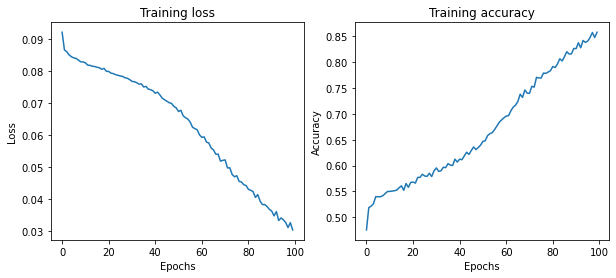

In [22]:

loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")



In [23]:
results = model.evaluate(X_test, y_test)

print(f"\nAccuracy on test set is {results[1]*100:.2f}%")

41/41 [==============================] - 1s 7ms/step - loss: 0.0883 - accuracy: 0.5938

Accuracy on test set is 59.38%
